<a href="https://colab.research.google.com/github/jina2531lee/tmp/blob/main/section3_python_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Natural Language Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

## 1.1 Data

* In this lecture, we use the SMS Spam Collection Data Set from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). 
    * A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site.
    * A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore.

In [7]:
#df_sms = pd.read_csv('./SMS_Spam.tsv', sep='\t')

import io
from google.colab import files
# uploaded = files.upload()

# df_sms = pd.read_csv(io.StringIO(uploaded['SMS_Spam.tsv'].decode('utf-8')), sep='\t')
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/KAIST_DataAnalytics실습/data/'
df_sms = pd.read_csv(path+'SMS_Spam.tsv', sep='\t')

Mounted at /content/drive


In [8]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1.2 Exploratory Data Analysis
* First, how many messages the data have?

In [9]:
len(df_sms)

5572

* Then, now, how many spams and hams each other?

In [10]:
df_sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

* Now, let's apply lengths of each message and create a new column.

In [11]:
df_sms['length'] = df_sms['message'].apply(len)

In [12]:
df_sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


* How are the lengths of messages distributed?

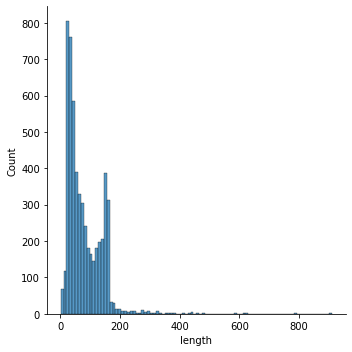

In [13]:
sns.displot(df_sms['length'])
plt.show()

* Are there any differences of the distribution of spam and ham messages?

In [21]:
df_spam = df_sms[df_sms['label']=='spam'].reset_index(drop=True)
df_ham = df_sms[df_sms['label']=='ham'].reset_index(drop=True)
df_ham2 = df_sms[df_sms['label']=='ham']

In [22]:
df_sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df_ham2.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [16]:
df_ham.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,ham,Even my brother is not like to speak with me. ...,77


<Figure size 1080x720 with 0 Axes>

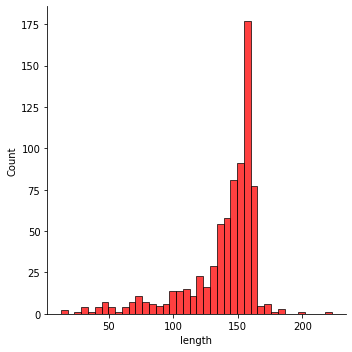

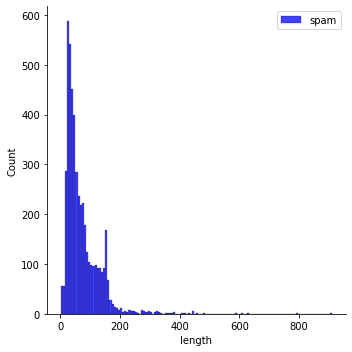

In [15]:
plt.figure(figsize=(15,10))

sns.displot(df_spam['length'], color='red')
sns.displot(df_ham['length'], color='blue')
plt.legend(labels=['spam','ham'])
plt.show()

## 1.3 Text preprocessing
* For analyzing texts, we need to split each message into individual words.
* Let's remove punctuations first.
    * Python's built-in library **string** would provide a quick and convenient way of removing them.

In [24]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

* Check characters whether they are punctuations or not.

In [25]:
sample = "Hello! This is Hyundai Card / Capital / Commercial - KAIST Ditigal Finance course"

In [26]:
sample_nopunc = []
for char in sample:
    if char not in string.punctuation:
        sample_nopunc.append(char)

In [27]:
sample_nopunc = "".join(sample_nopunc)

In [28]:
sample_nopunc

'Hello This is Hyundai Card  Capital  Commercial  KAIST Ditigal Finance course'

* Now, it's a step to remove stopwords. The NLTK library is a kind of stardard library for processing texts in Python (https://www.nltk.org/).
* The NLTK library provide a list of stopwords.

In [29]:
import nltk
from nltk.corpus import stopwords

* We can specify a language for stopwords list.

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

* Split the message and remove stopwords according to the list.

In [32]:
sample_nopunc

'Hello This is Hyundai Card  Capital  Commercial  KAIST Ditigal Finance course'

In [33]:
sample_nopunc.split()

['Hello',
 'This',
 'is',
 'Hyundai',
 'Card',
 'Capital',
 'Commercial',
 'KAIST',
 'Ditigal',
 'Finance',
 'course']

In [34]:
remove_stopwords = []
for word in sample_nopunc.split():
    if word.lower() not in stopwords.words('english'):
        remove_stopwords.append(word)

In [35]:
remove_stopwords

['Hello',
 'Hyundai',
 'Card',
 'Capital',
 'Commercial',
 'KAIST',
 'Ditigal',
 'Finance',
 'course']

* When you make a function for this, it would be more useful to apply it later.

In [36]:
def preprocessing(text):
    
    # remove punctuation
    nopunc = []
    for char in text:
        if char not in string.punctuation:
            nopunc.append(char)
            
    nopunc = "".join(nopunc)
    
    # remove stopwords
    remove_stop = []
    for word in nopunc.split():
        if word.lower() not in stopwords.words('english'):
            remove_stop.append(word)
            
    # remove words less than three characters
    tokens = []
    for word in remove_stop:
        if len(word) >= 3:
            tokens.append(word)
            
    #tokens = " ".join(tokens)
    
    return tokens

In [37]:
sample

'Hello! This is Hyundai Card / Capital / Commercial - KAIST Ditigal Finance course'

In [38]:
preprocessing(sample)

['Hello',
 'Hyundai',
 'Card',
 'Capital',
 'Commercial',
 'KAIST',
 'Ditigal',
 'Finance',
 'course']

* You can apply the preprocessing function to whole dataframe.

In [39]:
df_sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
df_sms['message'].apply(preprocessing)

0       [jurong, point, crazy, Available, bugis, great...
1                                 [lar, Joking, wif, oni]
2       [Free, entry, wkly, comp, win, Cup, final, tkt...
3                    [dun, say, early, hor, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, contact, £750, Pound, prize...
5568                             [going, esplanade, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

## 1.4 Frequency Analysis

In [41]:
clean_spam = df_spam['message'].apply(preprocessing)
clean_ham = df_ham['message'].apply(preprocessing)

* First, let's merge whole values of each dataframe into one list.

In [42]:
whole_spam = []
for line in clean_spam.tolist():
    whole_spam += line
    
whole_ham = []
for line in clean_ham.tolist():
    whole_ham += line

* The **Text** class in **NLTK** library provide some useful methods to text analysis.

In [43]:
from nltk import Text

ham_text = Text(whole_ham)
spam_text = Text(whole_spam)

* The **vocab** method in the **Text** class can extract the frequency of usage for each token.

In [44]:
freqDist_ham = ham_text.vocab()

In [45]:
freqDist_ham.most_common(10)

[('get', 290),
 ('ltgt', 276),
 ('know', 226),
 ('like', 219),
 ('dont', 208),
 ('come', 207),
 ('call', 203),
 ('got', 202),
 ('day', 174),
 ('time', 172)]

* How about spam messages?

In [46]:
freqDist_spam = spam_text.vocab()
freqDist_spam.most_common(10)

[('call', 189),
 ('Call', 137),
 ('FREE', 112),
 ('mobile', 95),
 ('claim', 78),
 ('prize', 73),
 ('text', 72),
 ('txt', 70),
 ('Txt', 70),
 ('STOP', 63)]

* You can plot the distribution of each token by the **plot** method.

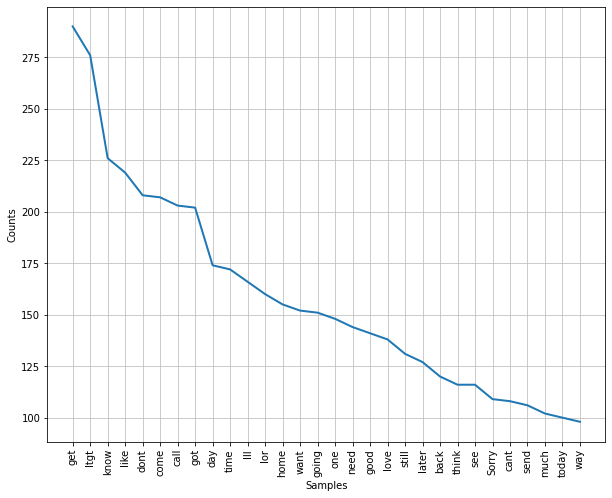

In [47]:
plt.figure(figsize=(10,8))

ham_text.plot(30)
plt.show()

* We can also use the **wordcloud** package for visualization. 
* You can download the package by `conda install -c conda-forge wordcloud`

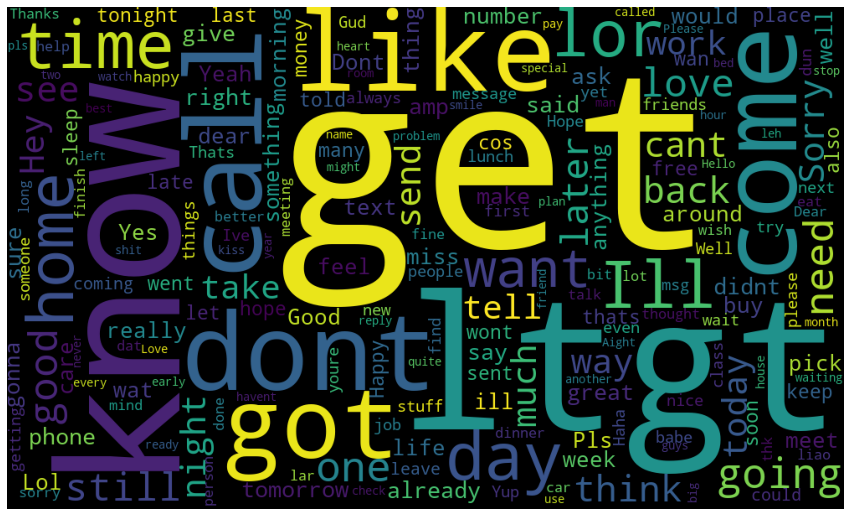

In [48]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))

wc_ham = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.imshow(wc_ham.generate_from_frequencies(freqDist_ham))
plt.axis("off")
plt.show()

# Part 2 : Recommendation System

* Recommendation system is a sort of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications (https://en.wikipedia.org/wiki/Recommender_system)
* There are two common types of recommender systems:
    * **Content-Based Filtering** focus on the attributes of the items and give you recommendations based on the similarity between them.
    
    * **Collaborative Filtering** produces recommendations based on the user's attitude (activity) to items.


* Movie recommendation is one of the first step to start learning recommendation systems.
* MovieLens dataset is a famous one for learning to build the recommendation systems.
    * https://grouplens.org/datasets/movielens/
    * https://kaggle.com/grouplens/movielens-20m-dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#movies = pd.read_csv('./movies.csv')

uploaded = files.upload()
movies = pd.read_csv(io.StringIO(uploaded['movies.csv'].decode('utf-8')))

* Let's produce a content-based filtering based on genre similarity.

In [ ]:
vectorizer = CountVectorizer()
genre_vec = vectorizer.fit_transform(movies['genres'])

In [ ]:
sim_mat = cosine_similarity(genre_vec, genre_vec)

In [ ]:
genre_sim = pd.DataFrame(index=movies['title'], columns=movies['title'], data=sim_mat)

* Now, let's import one more dataset "ratings.csv", and produce collaborative filtering.

In [ ]:
#ratings = pd.read_csv('./ratings.csv')

uploaded = files.upload()
ratings = pd.read_csv(io.StringIO(uploaded['ratings.csv'].decode('utf-8')))

In [ ]:
ratings.head()

* Let's merge those two dataframes.

* Which movie has the highest user ratings on average?

* Which movies received the most ratings from users?

* Let's combine of those two results.

In [ ]:
movie_ratings = pd.DataFrame(df_movies.groupby('title')['rating'].mean())
movie_ratings['numbers'] = pd.DataFrame(df_movies.groupby('title')['rating'].count())
movie_ratings.head()

* Now, reshape the dataframe with using pivot_table.

* Fill the NaN values to 0.

* Let's take two examples of movies.

In [ ]:
Matrix = user_movie_matrix['Matrix, The (1999)']
Matrix.head(10)

In [ ]:
Terminator = user_movie_matrix['Terminator 2: Judgment Day (1991)']
Terminator.head(10)

* How similar with those two movies?

* Which movie is the most similar with the "Matrix, The (1999)"?

In [ ]:
Matrix_corr = pd.DataFrame(user_movie_matrix.corrwith(Matrix), columns=['correl'])

In [ ]:
Matrix_corr.sort_values(by='correl', ascending=False).head(10)

* Now, let's use one more metric for similarity - Cosine similarity

In [ ]:
movie_user_matrix = df_movies.pivot_table(index='title', columns='userId', values='rating')
movie_user_matrix.head()

In [ ]:
movie_user_matrix.fillna(0, inplace=True)

item_based_filter = cosine_similarity(movie_user_matrix)

In [ ]:
item_based_matrix = pd.DataFrame(index=movie_user_matrix.index, columns=movie_user_matrix.index, data=item_based_filter)

# Part 3 : Cluster analysis

* Clustering is a Machine Learning technique that involves the grouping of data points.
    * https://en.wikipedia.org/wiki/Cluster_analysis
    * https://developers.google.com/machine-learning/clustering/clustering-algorithms
* K-means clustering is one of the simplest and popular unsupervised machine learning algorithms that will attempt to group similar clusters together in data (https://en.wikipedia.org/wiki/K-means_clustering).
* You can also check out further materials to learn.
    * http://www.mit.edu/~9.54/fall14/slides/Class13.pdf
    * https://www.youtube.com/watch?v=Ev8YbxPu_bQ
    * https://www.youtube.com/watch?v=hDmNF9JG3lo
    * https://www.coursera.org/learn/data-science-k-means-clustering-python#syllabus

* Let's apply the k-means algorithm to the sample data.

In [ ]:
#data = pd.read_csv('./samples.csv')

uploaded = files.upload()
data = pd.read_csv(io.StringIO(uploaded['samples.csv'].decode('utf-8')))

In [ ]:
sns.relplot(x='V1', y='V2', data=data, kind='scatter')
plt.show()

* Of course, the scikit-learn package provide model for k-means algorithm.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans_fit = kmeans.fit(data)

* How about applying a different K?

* How can we decide the best $K$ value? 

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_

In [ ]:
x = list(sse.keys())
y = list(sse.values())

plt.plot(x, y)
plt.show()

* Now, let's take a look at the customer segmentation data,
    * https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
#customers = pd.read_csv('./Mall_Customers.csv')

uploaded = files.upload()
customers = pd.read_csv(io.StringIO(uploaded['Mall_Customers.csv'].decode('utf-8')))

* Let's apply clustering algorithm with two features, annual income and spending score.

In [ ]:
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score',  data = customers)
plt.show()

In [ ]:
data = customers[['Annual_Income', 'Spending_Score']]

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans_fit = kmeans.fit(data)
labels = kmeans_fit.predict(data)

In [ ]:
customers['cluster'] = labels

In [ ]:
sns.relplot(x='Annual_Income', y='Spending_Score', hue='cluster',data=customers)
plt.show()

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_

In [ ]:
x = list(sse.keys())
y = list(sse.values())

plt.plot(x, y)
plt.show()

* One more thing with saving the trained model and reload to predict.
    * You can produce a kind of Web App with streamlit (https://streamlit.io/)

In [ ]:
from joblib import dump, load

dump(kmeans, './Mall_Customers_clusters.joblib')

In [ ]:
# load the model
model = load('./Mall_Customers_clusters.joblib')

In [ ]:
income = 80
score = 20

row = [income, score]
feat_cols = data.columns

df = pd.DataFrame([row], columns = feat_cols)
features = pd.DataFrame(df, columns = feat_cols)

In [ ]:
model.predict(features)